### CARGA DE LIBRERIAS

In [633]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time

# Machine Learning
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluación de modelos
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Análisis de componentes principales (PCA)
from sklearn.decomposition import PCA

# Estadísticas
import statsmodels.api as sm
import matplotlib.pyplot as bplt

### CARGA DE DATOS

In [634]:
df = pd.read_csv(f'C:/Users/adria/OneDrive/Escritorio/DS4B/Proyecto_1/credit_risk_dataset.csv', sep=',')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [635]:
print("Número d'atributs del dataset:", len(df.keys()))
print("Número de files en el dataset: ",df.shape[0])

print("\nAtributs del dataset i el seu tipus:")
print(df.dtypes) 

Número d'atributs del dataset: 12
Número de files en el dataset:  32581

Atributs del dataset i el seu tipus:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [636]:
nan_columns = df.columns[df.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(df.loc[:, nan_columns].isna().sum())

print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(df.loc[:, nan_columns].isna().sum() / len(df) * 100)

non_nan_columns = df.columns[df.isna().sum() == 0].tolist()

NÚMERO DE NANS POR COLUMNA:
person_emp_length     895
loan_int_rate        3116
dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
person_emp_length    2.747000
loan_int_rate        9.563856
dtype: float64


Breve visualización de las variables categóricas


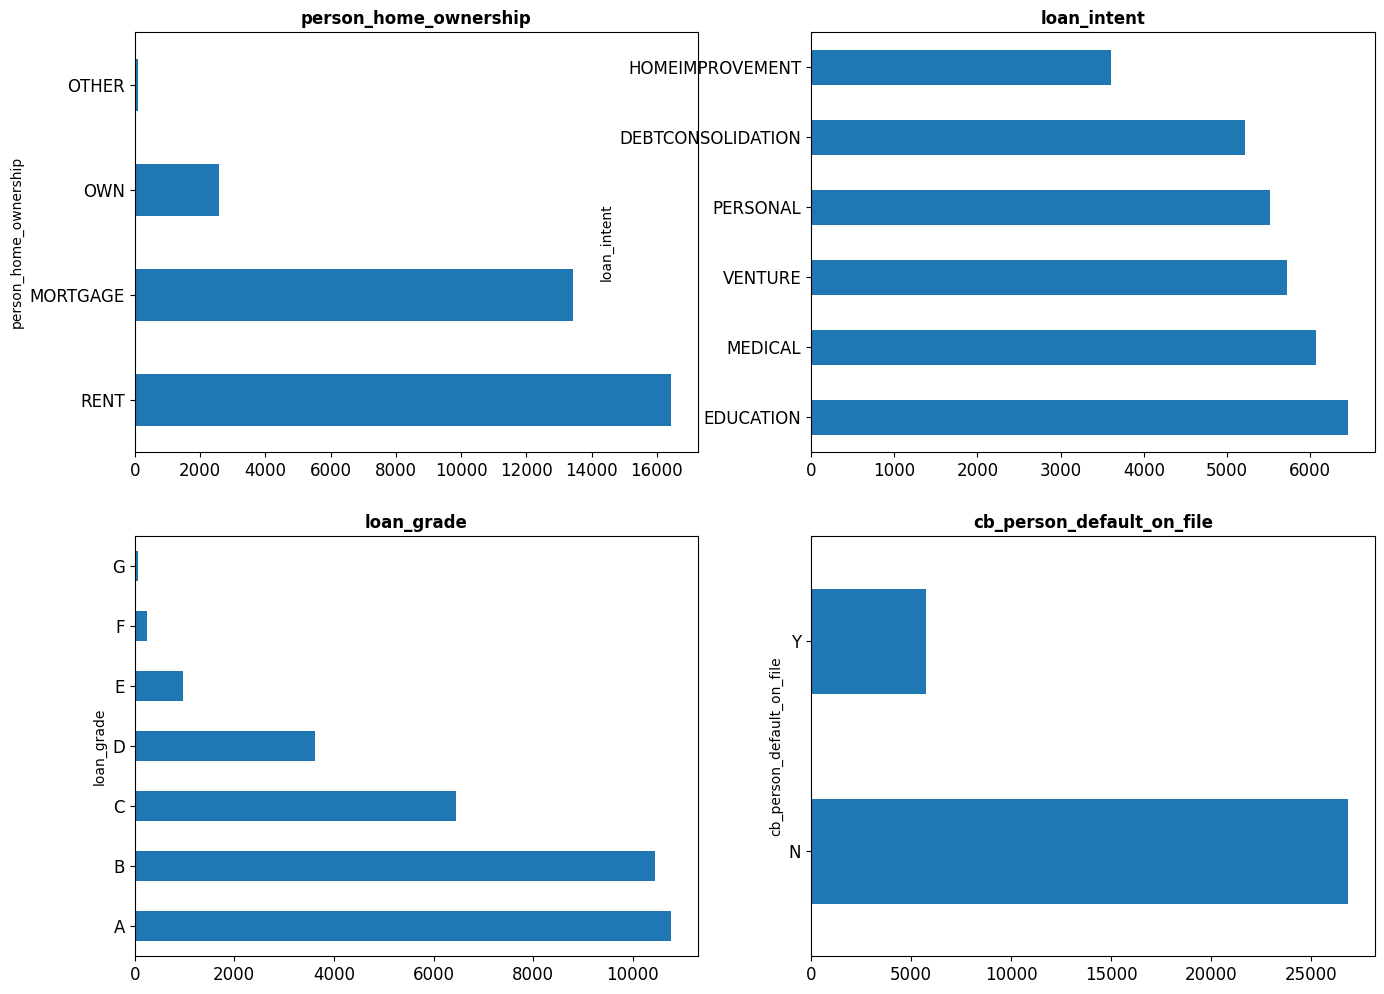

In [637]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O'))

print("Breve visualización de las variables categóricas")

In [638]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,26.00,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,55000.00,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.00,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,8000.00,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,10.99,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.00,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.15,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.00,4.055001,2.00,3.00,4.00,8.00,30.00


OBSERVACIONES:
- NO TIENE SENTIDO QUE UNA PERSONA TENGA 144 AÑOS -> ELIMINAR ESTA FILA
- REVISAR NANS
- NO TIENE SENTIDO QUE UNA PERSONA LLEVE DE EMPLEO 123 AÑOS -> ELIMINAR FILA

In [639]:
# Eliminar las filas donde 'person_age' es igual a 144
df = df[df['person_age'] <= 100]
df = df[df['person_emp_length'] <= 100]
# Verificar el resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31679 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31679 non-null  int64  
 1   person_income               31679 non-null  int64  
 2   person_home_ownership       31679 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 31679 non-null  object 
 5   loan_grade                  31679 non-null  object 
 6   loan_amnt                   31679 non-null  int64  
 7   loan_int_rate               28632 non-null  float64
 8   loan_status                 31679 non-null  int64  
 9   loan_percent_income         31679 non-null  float64
 10  cb_person_default_on_file   31679 non-null  object 
 11  cb_person_cred_hist_length  31679 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [640]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
person_age,31679.0,27.730673,26.00,6.213427,20.00,23.00,26.00,30.00,94.00
person_income,31679.0,66490.099182,56000.00,52768.793429,4000.00,39366.00,56000.00,80000.00,2039784.00
person_emp_length,31679.0,4.782064,4.00,4.034948,0.00,2.00,4.00,7.00,41.00
loan_amnt,31679.0,9659.962436,8000.00,6334.360554,500.00,5000.00,8000.00,12500.00,35000.00
loan_int_rate,28632.0,11.039701,10.99,3.229409,5.42,7.90,10.99,13.48,23.22
loan_status,31679.0,0.215442,0.00,0.411135,0.00,0.00,0.00,0.00,1.00
loan_percent_income,31679.0,0.169610,0.15,0.106269,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,31679.0,5.809211,4.00,4.059710,2.00,3.00,4.00,8.00,30.00


In [641]:
nan_columns = df.columns[df.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(df.loc[:, nan_columns].isna().sum())

print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(df.loc[:, nan_columns].isna().sum() / len(df) * 100)

non_nan_columns = df.columns[df.isna().sum() == 0].tolist()

print("Se ve que eliminando filas sin sentido se han ido los Nans de person_emp_length", 
      "así que solo queda actuar en la columna loan_int_rate")

NÚMERO DE NANS POR COLUMNA:
loan_int_rate    3047
dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
loan_int_rate    9.618359
dtype: float64
Se ve que eliminando filas sin sentido se han ido los Nans de person_emp_length así que solo queda actuar en la columna loan_int_rate


In [642]:
#IMPUTACIÓN CON mediana

median_imputer = SimpleImputer(strategy='median')

# Imputar los valores faltantes en la columna 'loan_int_rate'
df['loan_int_rate'] = median_imputer.fit_transform(df[['loan_int_rate']])


In [643]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
person_age,31679.0,27.730673,26.00,6.213427,20.00,23.00,26.00,30.00,94.00
person_income,31679.0,66490.099182,56000.00,52768.793429,4000.00,39366.00,56000.00,80000.00,2039784.00
person_emp_length,31679.0,4.782064,4.00,4.034948,0.00,2.00,4.00,7.00,41.00
loan_amnt,31679.0,9659.962436,8000.00,6334.360554,500.00,5000.00,8000.00,12500.00,35000.00
loan_int_rate,31679.0,11.034921,10.99,3.070205,5.42,8.49,10.99,13.16,23.22
loan_status,31679.0,0.215442,0.00,0.411135,0.00,0.00,0.00,0.00,1.00
loan_percent_income,31679.0,0.169610,0.15,0.106269,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,31679.0,5.809211,4.00,4.059710,2.00,3.00,4.00,8.00,30.00


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es el Riesgo de impago del crédito?

In [644]:
df.loan_status.value_counts(normalize = True) * 100

loan_status
0    78.455759
1    21.544241
Name: proportion, dtype: float64

- Más del 78% de los clientes no presentan riesgo sobre el pago del crédito. 
- De una forma más técnica esto se traduce a un dataset bastante desbalanceado

C:\Users\adria\AppData\Local\Temp\ipykernel_23388\737779034.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp5 = df.groupby('age_group')['loan_status'].mean().sort_values(ascending=False) * 100
C:\Users\adria\AppData\Local\Temp\ipykernel_23388\737779034.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp6 = df.groupby('income_group')['loan_status'].mean().sort_values(ascending=False) * 100


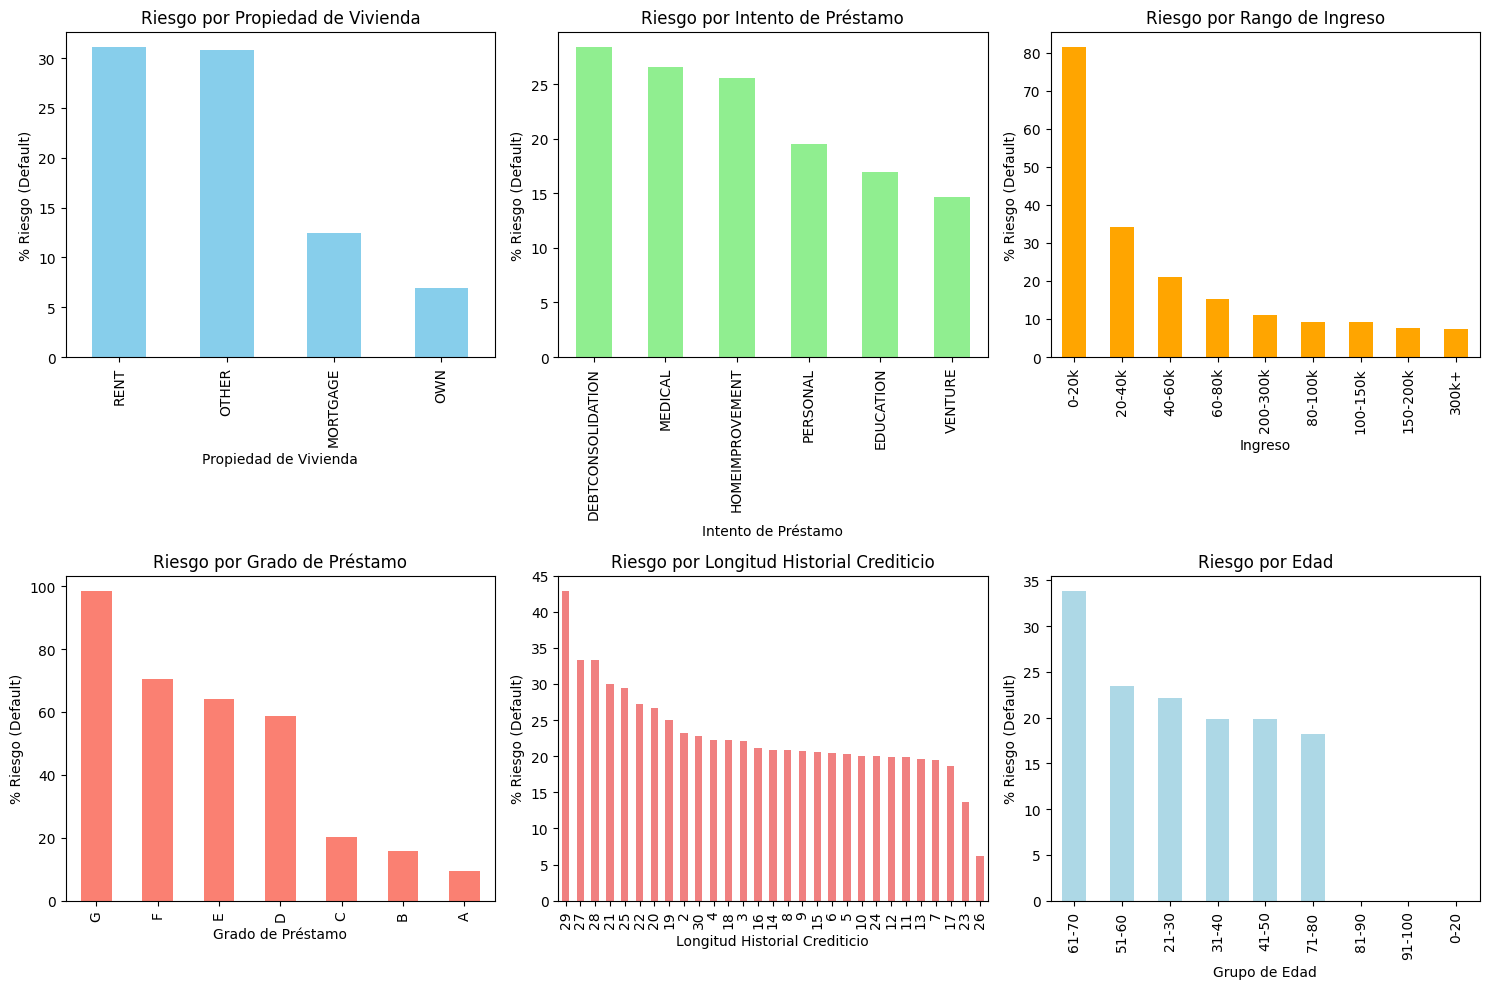

In [645]:
import matplotlib.pyplot as plt
import pandas as pd

# Análisis por características relacionadas con el riesgo
temp1 = df.groupby('person_home_ownership')['loan_status'].mean().sort_values(ascending=False) * 100
temp2 = df.groupby('loan_intent')['loan_status'].mean().sort_values(ascending=False) * 100
temp3 = df.groupby('loan_grade')['loan_status'].mean().sort_values(ascending=False) * 100
temp4 = df.groupby('cb_person_cred_hist_length')['loan_status'].mean().sort_values(ascending=False) * 100

# Análisis por edad
# Crear rangos de edad para agrupar
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Asignar los rangos de edad a la columna 'age_group'
df['age_group'] = pd.cut(df['person_age'], bins=age_bins, labels=age_labels, right=False)

# Calcular el riesgo por grupo de edad
temp5 = df.groupby('age_group')['loan_status'].mean().sort_values(ascending=False) * 100

# Análisis por ingresos
# Crear rangos de ingresos (por ejemplo, deciles de ingresos)
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, 300000, 500000]
income_labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-150k', '150-200k', '200-300k', '300k+']

# Asignar los rangos de ingresos a la columna 'income_group'
df['income_group'] = pd.cut(df['person_income'], bins=income_bins, labels=income_labels, right=False)

# Calcular el riesgo por grupo de ingresos
temp6 = df.groupby('income_group')['loan_status'].mean().sort_values(ascending=False) * 100

# Crear los subgráficos (2 filas, 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Graficar en cada subgráfico para cada característica
temp1.plot.bar(ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Riesgo por Propiedad de Vivienda')
axes[0, 0].set_xlabel('Propiedad de Vivienda')
axes[0, 0].set_ylabel('% Riesgo (Default)')

temp2.plot.bar(ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Riesgo por Intento de Préstamo')
axes[0, 1].set_xlabel('Intento de Préstamo')
axes[0, 1].set_ylabel('% Riesgo (Default)')

temp6.plot.bar(ax=axes[0, 2], color='orange')
axes[0, 2].set_title('Riesgo por Rango de Ingreso')
axes[0, 2].set_xlabel('Ingreso')
axes[0, 2].set_ylabel('% Riesgo (Default)')

temp3.plot.bar(ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Riesgo por Grado de Préstamo')
axes[1, 0].set_xlabel('Grado de Préstamo')
axes[1, 0].set_ylabel('% Riesgo (Default)')

temp4.plot.bar(ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Riesgo por Longitud Historial Crediticio')
axes[1, 1].set_xlabel('Longitud Historial Crediticio')
axes[1, 1].set_ylabel('% Riesgo (Default)')

# Graficar el análisis por edad
temp5.plot.bar(ax=axes[1, 2], color='lightblue')
axes[1, 2].set_title('Riesgo por Edad')
axes[1, 2].set_xlabel('Grupo de Edad')
axes[1, 2].set_ylabel('% Riesgo (Default)')

df = df.drop(columns=['age_group', 'income_group'])

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()  # Ajusta el espacio para evitar que se solapen los gráficos

# Mostrar los gráficos
plt.show()


DIFERENTES CONCLUSIONES:
- Los préstamos para personas en alquiler u "otros" son los que más peligro corren.
- Aquellos con motivo de consolidación de deuda, médicos y mejoras del hogar, también.
- Salarios anuales inferiores a los 20.000k son créditos en riesgo.
- Podemos observar que lógicamente, según el grado hay más riesgo de A-G de forma ascendente.
- Las personas con historial crediticio mayor de 20 años muestran un claro aumento en el riesgo.
- El rango de edad de los 51 a los 70 suponen un aumento de la peligrosidad del crédito.

### QUÉ CANTIDAD DE DINERO HAY EN RIESGO?

In [646]:
import numpy as np

# Crear una columna 'risk_money' con múltiples factores

def calculate_risk_money(row):
    # Condición básica: Si el préstamo está en riesgo (loan_status = 1), calculamos el riesgo
    if row['loan_status'] == 1:
        risk = row['loan_amnt']  # Inicializamos con el monto del préstamo

        # Factor adicional: Ajuste según el 'loan_grade'
        if row['loan_grade'] in ['D', 'E', 'F', 'G']:  # Asumiendo que estas letras son de mayor riesgo
            risk *= 1.3  # Aumentamos el riesgo en un 20% para los préstamos de menor grado
        
        # Factor adicional: Ajuste según la tasa de interés (mayor tasa -> más riesgo)
        risk *= 1 + (row['loan_int_rate'] / 100)  # Aumentamos el riesgo basado en la tasa de interés
        
        # Factor adicional: Ajuste según los ingresos de la persona (menos ingresos -> mayor riesgo)
        if row['person_income'] < 20000:
            risk *= 1.3  # Aumentamos el riesgo en un 30% para aquellos con ingresos bajos
        
        # Factor adicional: Ajuste según la edad de la persona (mayor riesgo para edades extremas)
        if row['person_age'] < 71 or row['person_age'] > 60:
            risk *= 1.1  # Aumentamos el riesgo en un 10% para personas muy  mayores
        
        # Factor adicional: Ajuste según la propiedad de la vivienda (no propietario podría implicar más riesgo)
        if row['person_home_ownership'] in ['RENT', 'OTHER']:
            risk *= 1.2  # Aumentamos el riesgo en un 20% si es "RENT" o "OTHER"

        return risk
    else:
        return 0  # Si no hay riesgo (loan_status = 0), el dinero en riesgo es 0

# Aplicar la función para crear la columna 'risk_money'
df['risk_money'] = df.apply(calculate_risk_money, axis=1)

df


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,risk_money
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.0000
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,8877.2255
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,53236.2600
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,52792.7400
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,3830.2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0.0000
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0.0000
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,51277.3800
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0.0000


In [647]:
coste_total =  df.loc[df.loan_status == 1].risk_money.sum()
coste_total

np.float64(123066610.304077)

In [648]:
df = df.drop(columns=['risk_money'])
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#### Realmente este enfoque es una suposición o hipótesis, ya que simplemente estamos aplicando que determinados colectivos hacen aumentar el dinero que esta en peligro de ser perdido.

# MACHINE LEARNING

In [649]:
df_ml = df.copy()

In [650]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse_output = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

cat_ohe

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31674,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
31675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31676,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [651]:
num = df.select_dtypes('number').reset_index(drop = True)
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,21,9600,5.0,1000,11.14,0,0.10,2
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,25,9600,1.0,5500,12.87,1,0.57,3
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,23,65500,4.0,35000,15.23,1,0.53,2
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,24,54400,8.0,35000,14.27,1,0.55,4
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,21,9900,2.0,2500,7.14,1,0.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31674,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,57,53000,1.0,5800,13.16,0,0.11,30
31675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,54,120000,4.0,17625,7.49,0,0.15,19
31676,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,65,76000,3.0,35000,10.99,1,0.46,28
31677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,56,150000,5.0,15000,11.48,0,0.10,26


#### NORMALIZACIÓN

In [652]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas que deseas normalizar (ejemplo: 'loan_amnt', 'person_income', 'person_age', etc.)
columns_to_normalize = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']

# Aplicar el MinMaxScaler
df_ml[columns_to_normalize] = scaler.fit_transform(df_ml[columns_to_normalize])

# Verificar las primeras filas después de la normalización
df_ml


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,...,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.013514,0.002751,0.121951,0.014493,0.321348,0,0.10,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.067568,0.002751,0.024390,0.144928,0.418539,1,0.57,0.035714
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.040541,0.030209,0.097561,1.000000,0.551124,1,0.53,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.054054,0.024757,0.195122,1.000000,0.497191,1,0.55,0.071429
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.013514,0.002898,0.048780,0.057971,0.096629,1,0.25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31674,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.500000,0.024069,0.024390,0.153623,0.434831,0,0.11,1.000000
31675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.459459,0.056981,0.097561,0.496377,0.116292,0,0.15,0.607143
31676,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.608108,0.035367,0.073171,1.000000,0.312921,1,0.46,0.928571
31677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.486486,0.071717,0.121951,0.420290,0.340449,0,0.10,0.857143


### DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [653]:
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

def f1_score_comparison(models, f1_scores):
    # Crear una paleta de colores con diferentes tonalidades de plateado
    colors = plt.cm.Greys(np.linspace(0.5, 0.9, len(models)))
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color=colors, edgecolor='darkgray', linewidth=1.5)  # Añadimos bordes
    
    plt.xlabel('F1-Score', fontsize=12)
    plt.ylabel('Models', fontsize=12)
    plt.title('Comparación entre modelos', fontsize=14, weight='bold')
    
    for i, v in enumerate(f1_scores):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10, color='black')  # Color negro o más oscuro para los números
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Añadir líneas de cuadrícula en el eje X
    plt.tight_layout()
    plt.show()
    
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve_comparison(models, X_test, y_test):
    """
    Función para comparar las curvas ROC de diferentes modelos y sus valores ROC AUC.

    models: Diccionario con el nombre del modelo y las predicciones de probabilidad.
            Ejemplo: {'Modelo A': predicciones_modelo_a, 'Modelo B': predicciones_modelo_b, ...}
    X_test: Conjunto de datos de prueba (features).
    y_test: Etiquetas verdaderas de prueba.
    """
    
    plt.figure(figsize=(10, 8))
    
    # Curva ROC de cada modelo
    for model_name, predictions in models.items():
        # Calculamos las tasas de falsos positivos y verdaderos positivos
        fpr, tpr, thresholds = roc_curve(y_test, predictions)
        
        # Calculamos el ROC AUC
        auc = roc_auc_score(y_test, predictions)
        
        # Graficamos la curva ROC
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

    # Configuraciones de la gráfica
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (sin discriminación)
    plt.title('Comparación de Curvas ROC')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


models = ['DecisionTreeClassifier', 'LogisticRegression', 'Random Forest Classifier', 'KNeighbors Classifier', 'XGBClassifier', 'HistGradientBoostingClassifier']
f1_scores = []
roc_auc = {}

In [654]:
x = df_ml.drop(columns='loan_status')
y = df_ml['loan_status']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1) 

#ENTRENAMIENTO DEL MODELO

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(X_train,y_train)

#PREDICCIÓN Y VALIDACIÓN SOBRE TEST

# Predicción
pred_dec = ac.predict_proba(X_test)[:, 1]
pred_dec[:50]

array([0.06847529, 0.06847529, 0.06847529, 0.78255675, 0.4304318 ,
       0.06847529, 0.06847529, 0.06847529, 0.50124069, 0.06847529,
       0.06847529, 0.06847529, 0.06847529, 0.06847529, 0.06847529,
       0.06847529, 0.06847529, 0.06847529, 0.06847529, 0.06847529,
       0.06847529, 0.50124069, 0.4304318 , 0.06847529, 0.4304318 ,
       0.06847529, 0.4304318 , 0.78255675, 0.06847529, 0.06847529,
       0.06847529, 0.12176166, 0.06847529, 0.06847529, 0.06847529,
       1.        , 0.12176166, 0.06847529, 0.06847529, 0.06847529,
       0.06847529, 0.06847529, 1.        , 0.12176166, 0.14651163,
       0.06847529, 0.06847529, 0.4304318 , 1.        , 0.06847529])

In [655]:
f1=calculate_f1_score("DecisionTreeClassifier", DecisionTreeClassifier(max_depth = 4), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

DecisionTreeClassifier f1_train: 0.88412
DecisionTreeClassifier f1_test: 0.87948


In [656]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,pred_dec)

np.float64(0.8583516783090646)

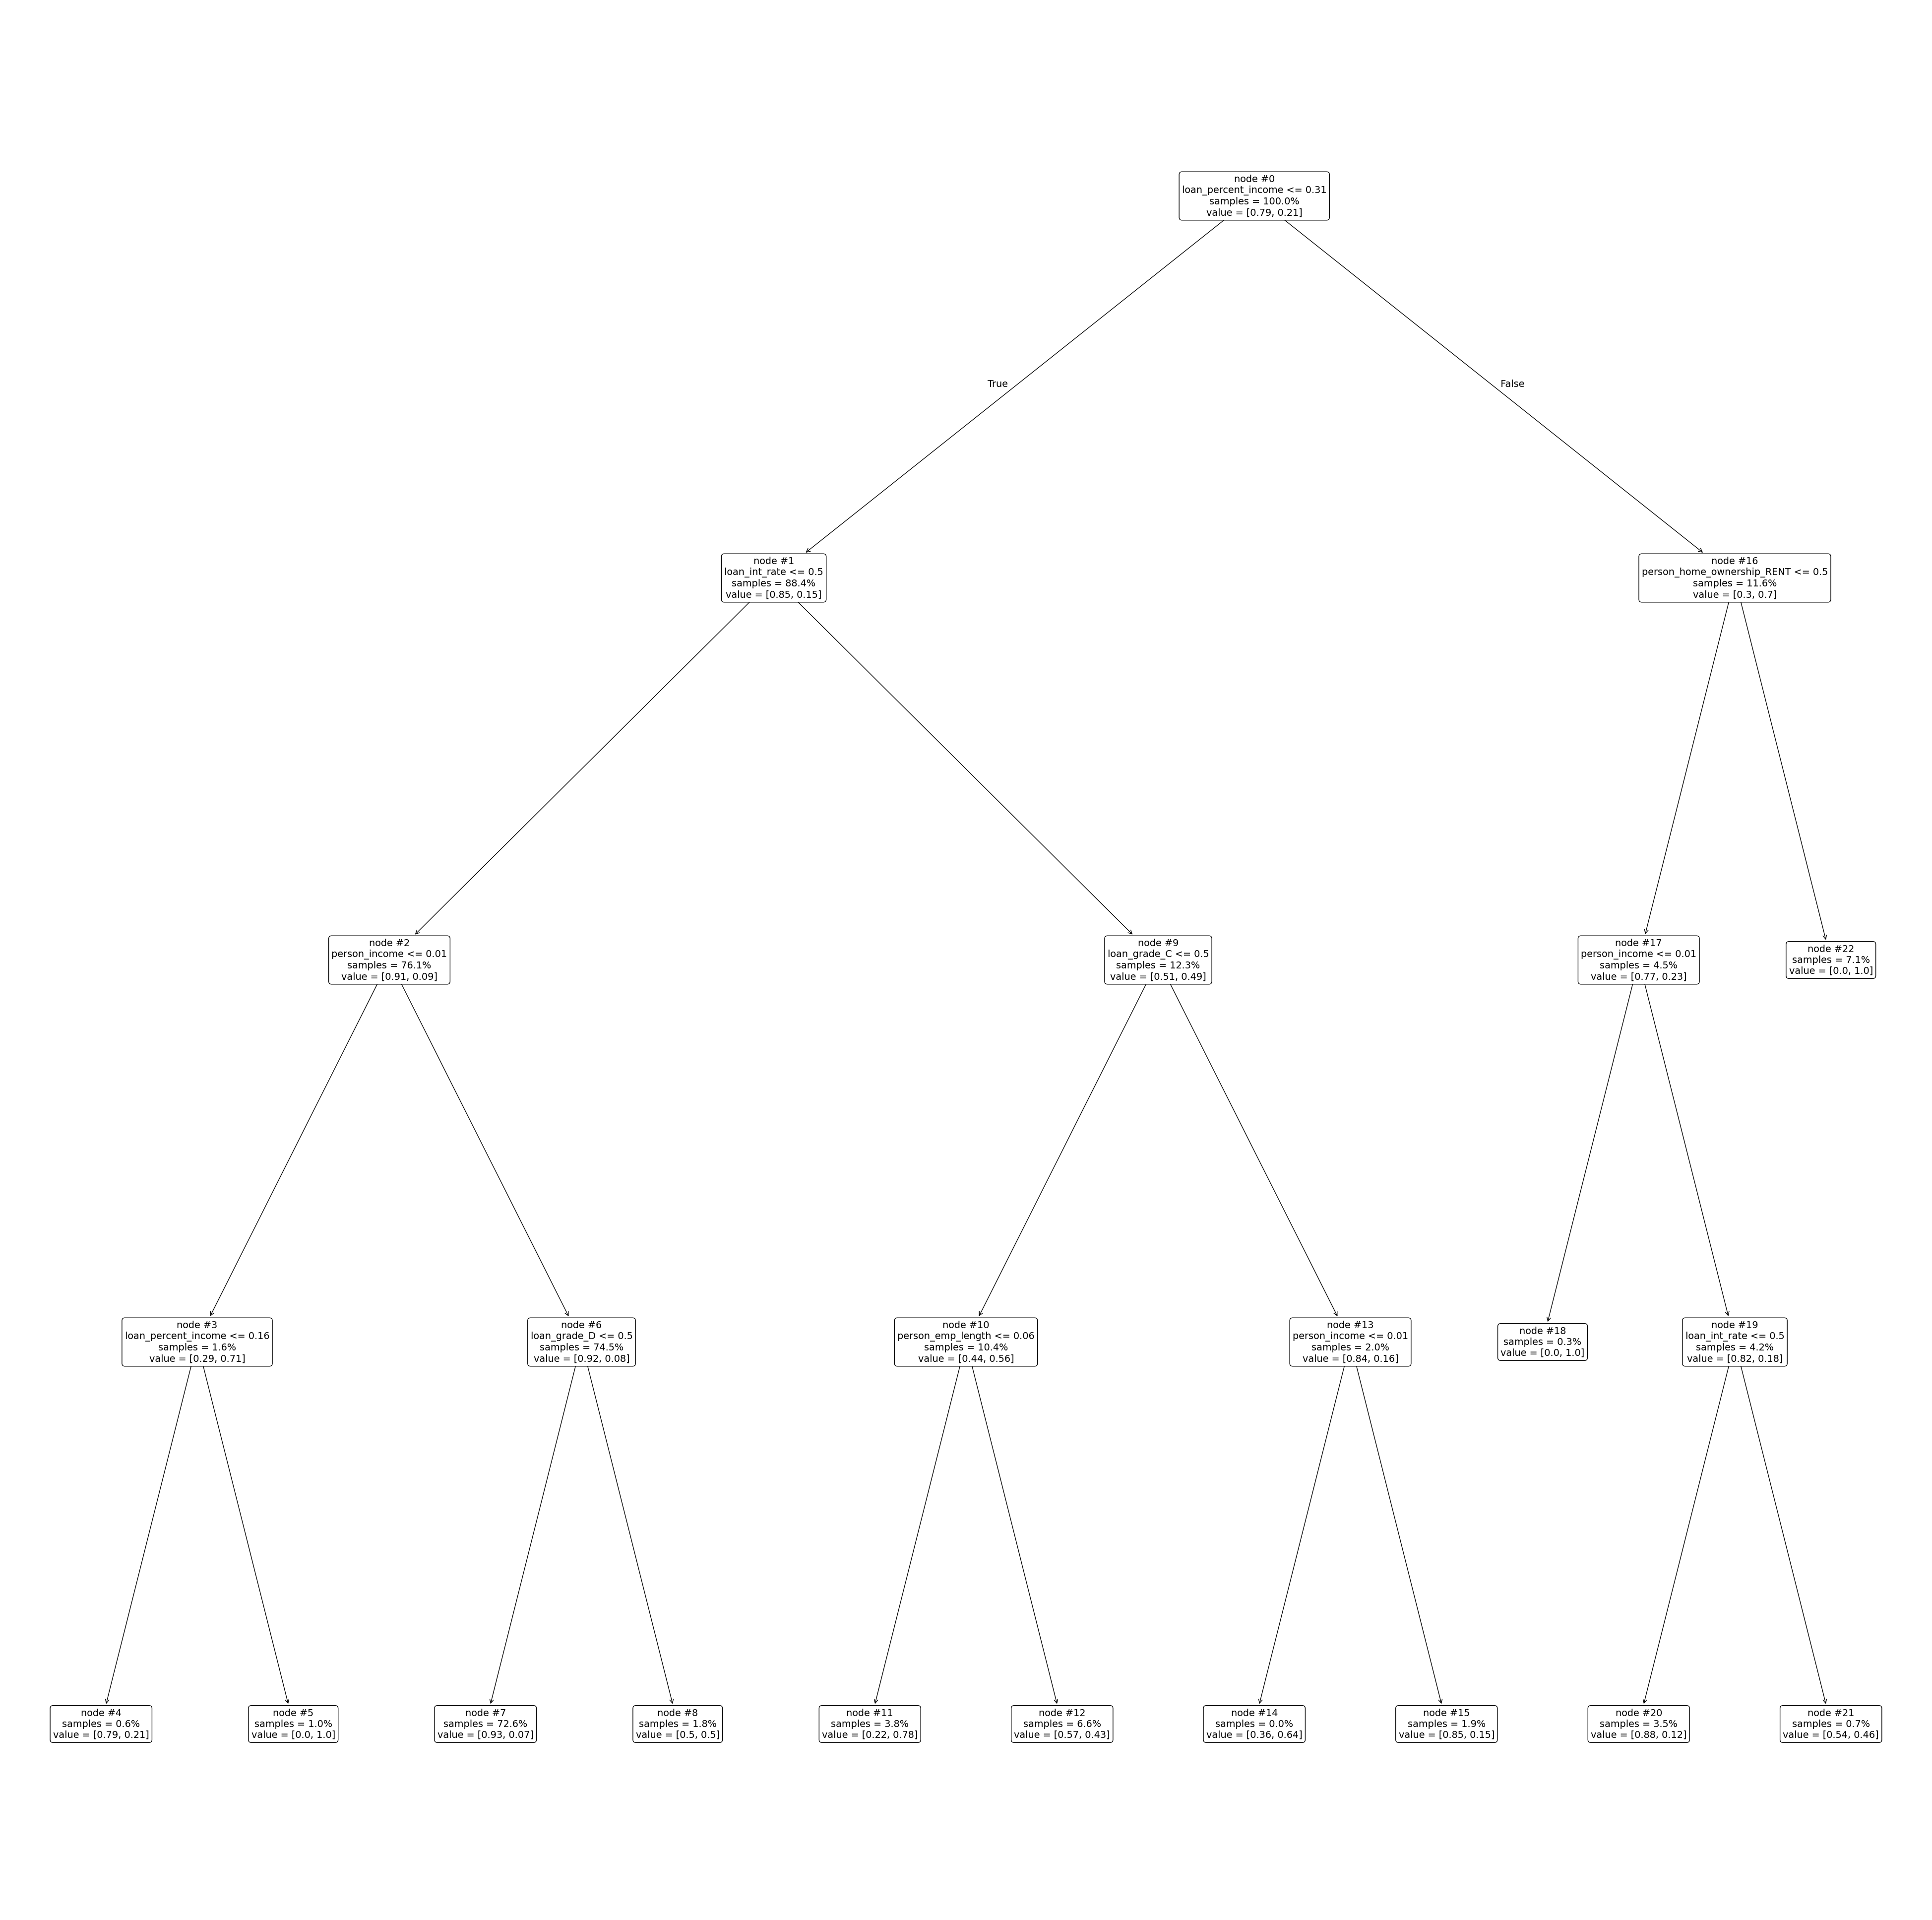

In [657]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

### Importancia de las variables

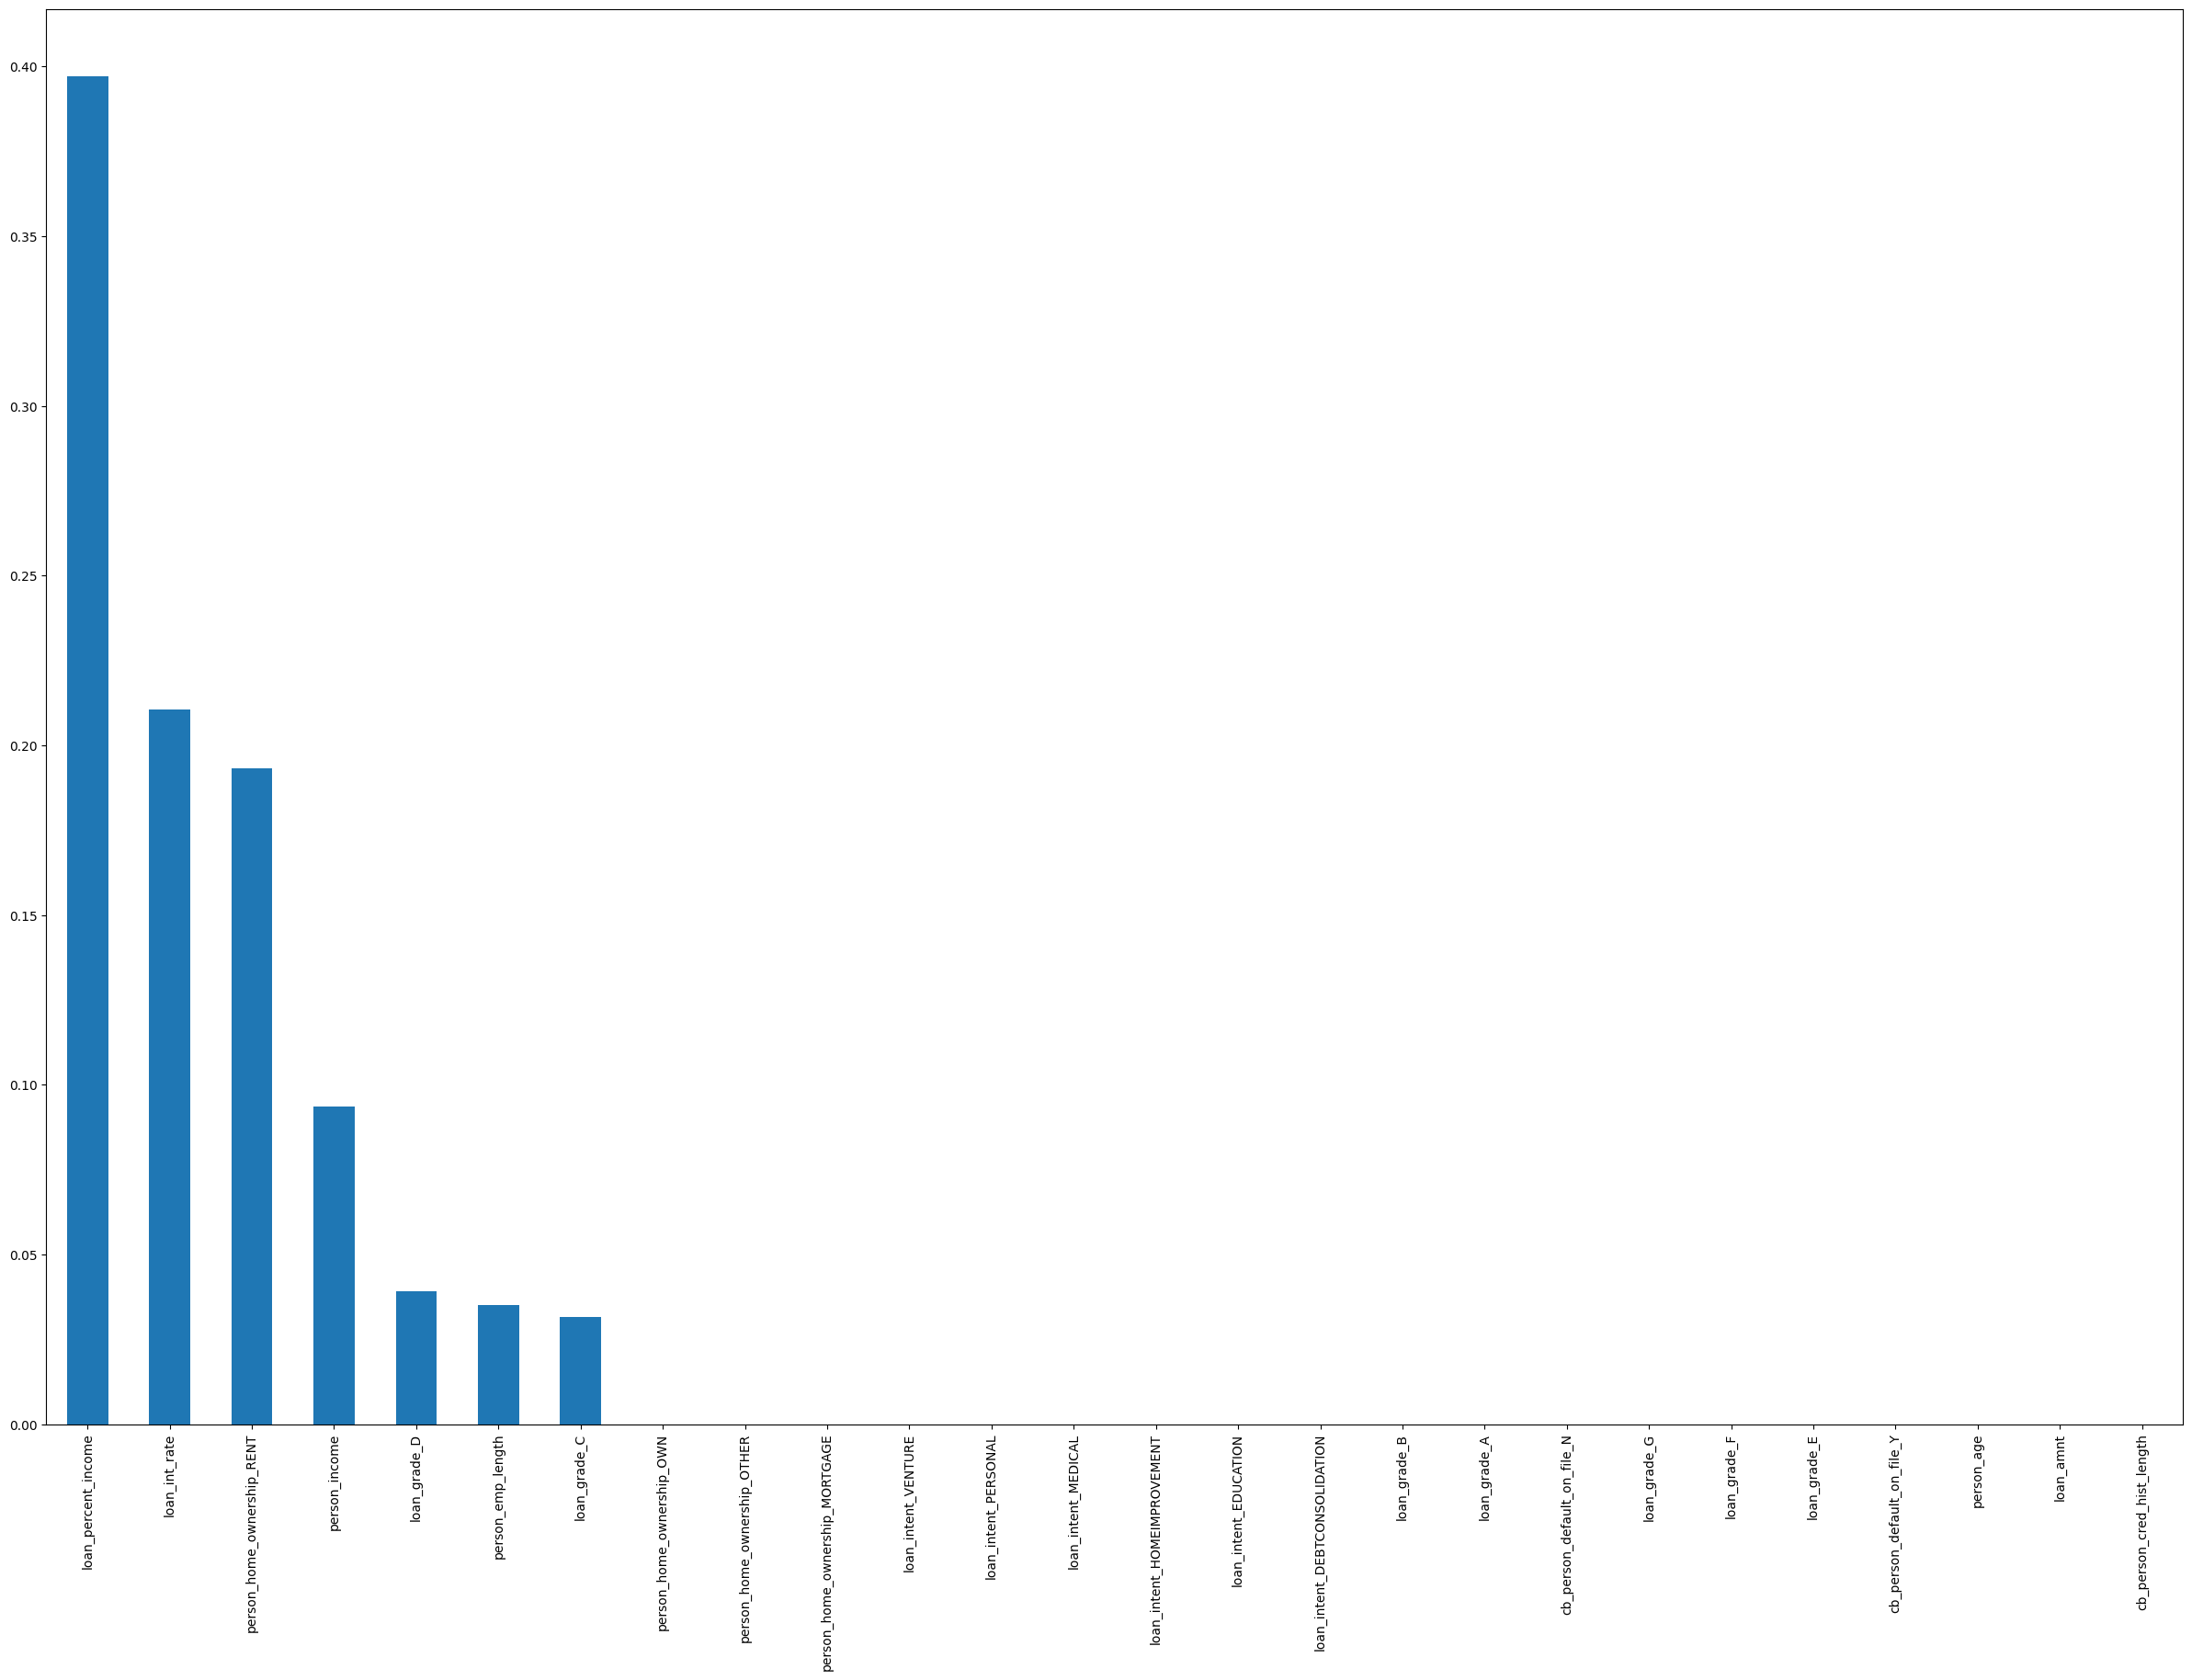

In [658]:
pd.Series(ac.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### Variables más importantes:
- El porcentaje del ingreso anual de la persona que se destina al pago del préstamo.
- La tasa de interés anual aplicada al préstamo.
- Persona que viva de alquiler
- Ingreso anual 
- Crédito de tipo D
- Años de una persona bajo empleo
- Crédito de tipo C

### PROBAMOS OTROS MODELOS

In [659]:
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train, y_train)

pred_log = logreg.predict_proba(X_test)[:, 1]
pred_log[:50]

array([0.0446777 , 0.04394574, 0.00597655, 0.8220436 , 0.46581403,
       0.0283639 , 0.01922977, 0.19181467, 0.68281442, 0.14281593,
       0.32904713, 0.02107137, 0.03865806, 0.02806351, 0.01388123,
       0.04987527, 0.02014895, 0.08748767, 0.02242095, 0.11057349,
       0.09430988, 0.60326731, 0.59232005, 0.03363745, 0.1734461 ,
       0.03416478, 0.48275199, 0.69373292, 0.27606383, 0.19853412,
       0.11456394, 0.25097871, 0.25676273, 0.09087569, 0.1848354 ,
       0.34815974, 0.20502479, 0.07794272, 0.03659969, 0.00436162,
       0.04228202, 0.23114544, 0.20075096, 0.04223513, 0.19390852,
       0.07329326, 0.03886134, 0.15496709, 0.44790566, 0.01373625])

In [660]:
roc_auc_score(y_test,pred_log)

np.float64(0.875578917215991)

In [661]:
f1=calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

LogisticRegression f1_train: 0.85812
LogisticRegression f1_test: 0.85485


In [662]:
rand = RandomForestClassifier()
rand.fit(X_train, y_train)

pred_rand = rand.predict_proba(X_test)[:, 1]
pred_rand[:50]

array([0.09, 0.08, 0.01, 0.95, 0.3 , 0.  , 0.01, 0.24, 0.87, 0.12, 0.07,
       0.06, 0.04, 0.01, 0.01, 0.02, 0.  , 0.03, 0.05, 0.01, 0.02, 0.76,
       0.2 , 0.03, 0.23, 0.03, 0.24, 0.9 , 0.09, 0.78, 0.  , 0.24, 0.12,
       0.04, 0.11, 0.99, 0.06, 0.13, 0.1 , 0.  , 0.14, 0.13, 0.95, 0.03,
       0.19, 0.  , 0.02, 0.12, 0.98, 0.07])

In [663]:
roc_auc_score(y_test,pred_rand)

np.float64(0.9314978173065886)

In [664]:
f1=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train, y_train, X_test, y_test)
f1_scores.append(f1)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.92982


In [665]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_knn = knn.predict_proba(X_test)[:, 1]
pred_knn[:50]

array([0. , 0.2, 0. , 1. , 0. , 0. , 0. , 0.4, 1. , 0.2, 0. , 0. , 0.2,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.2, 0. , 0. , 0. ,
       0.6, 0.6, 0.2, 0.8, 0. , 0.6, 0. , 0. , 0.2, 1. , 0. , 0. , 0. ,
       0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0. ])

In [666]:
roc_auc_score(y_test,pred_knn)

np.float64(0.8633125722525581)

In [667]:
f1=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(),  X_train, y_train, X_test, y_test)
f1_scores.append(f1)

KNeighbors Classifier f1_train: 0.9117
KNeighbors Classifier f1_test: 0.88001


In [668]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict_proba(X_test)[:, 1]
pred_xgb[:50]

array([1.7013500e-03, 1.4283598e-02, 2.0024903e-05, 9.8934925e-01,
       3.4941278e-02, 2.6247617e-02, 1.4709374e-03, 1.1013482e-01,
       9.8049611e-01, 5.9624769e-02, 4.6292100e-02, 1.1631492e-02,
       5.0808880e-03, 3.8512215e-02, 1.8687833e-03, 5.4864613e-03,
       8.4895091e-03, 5.0361708e-02, 2.1785941e-02, 2.1798220e-02,
       4.0158410e-02, 4.5172036e-01, 3.1640619e-01, 1.6061877e-01,
       3.7131056e-02, 3.1785078e-02, 5.9835756e-01, 9.7578853e-01,
       1.8586902e-02, 9.9305975e-01, 4.6135909e-03, 1.4078321e-01,
       4.4440717e-02, 2.2406977e-02, 2.3175015e-01, 9.8328769e-01,
       5.8435416e-03, 4.7801983e-02, 1.8024051e-01, 1.2244351e-03,
       2.8979838e-02, 1.0552599e-01, 9.7904670e-01, 7.3376863e-04,
       7.6593183e-02, 1.1039291e-03, 6.8015949e-04, 2.2423873e-02,
       9.8908943e-01, 1.7579848e-02], dtype=float32)

In [669]:
roc_auc_score(y_test,pred_xgb)

np.float64(0.9506978136683392)

In [670]:
from xgboost import XGBClassifier

f1=calculate_f1_score("XGBClassifier", XGBClassifier(),  X_train, y_train, X_test, y_test)
f1_scores.append(f1)

XGBClassifier f1_train: 0.95736
XGBClassifier f1_test: 0.93258


In [671]:
from sklearn.ensemble import HistGradientBoostingClassifier

light = HistGradientBoostingClassifier()
light.fit(X_train, y_train)

pred_light = light.predict_proba(X_test)[:, 1]
pred_light[:50]

array([9.11215032e-03, 3.00768549e-02, 9.16951154e-04, 9.88852427e-01,
       1.45987412e-01, 5.14834475e-02, 5.80519398e-03, 1.40033291e-01,
       9.77177279e-01, 6.02212505e-02, 1.15855679e-01, 2.10652782e-02,
       2.04780515e-02, 5.76718152e-02, 6.62195857e-03, 1.38078625e-02,
       1.90654653e-02, 2.61934202e-02, 2.85902226e-02, 1.18249976e-01,
       3.25719127e-02, 3.57892312e-01, 1.90908453e-01, 7.46879308e-02,
       8.50097200e-02, 5.63303014e-02, 4.77432418e-01, 9.63446607e-01,
       5.86354650e-02, 9.97738632e-01, 2.38707205e-02, 1.31659624e-01,
       1.12346801e-01, 4.55866104e-02, 1.70565300e-01, 9.72469200e-01,
       3.16926310e-02, 6.72889433e-02, 8.39325606e-02, 1.51945805e-03,
       7.06425213e-02, 9.53314401e-02, 9.68353089e-01, 5.89120519e-03,
       2.82775149e-01, 5.73112171e-03, 2.12543179e-03, 9.25407682e-02,
       9.68113997e-01, 4.57236574e-02])

In [672]:
roc_auc_score(y_test,pred_light)

np.float64(0.9468136301632395)

In [673]:
from sklearn.ensemble import HistGradientBoostingClassifier

f1=calculate_f1_score("HistGradientBoostingClassifier", HistGradientBoostingClassifier(),  X_train, y_train, X_test, y_test)
f1_scores.append(f1)

HistGradientBoostingClassifier f1_train: 0.9405
HistGradientBoostingClassifier f1_test: 0.933


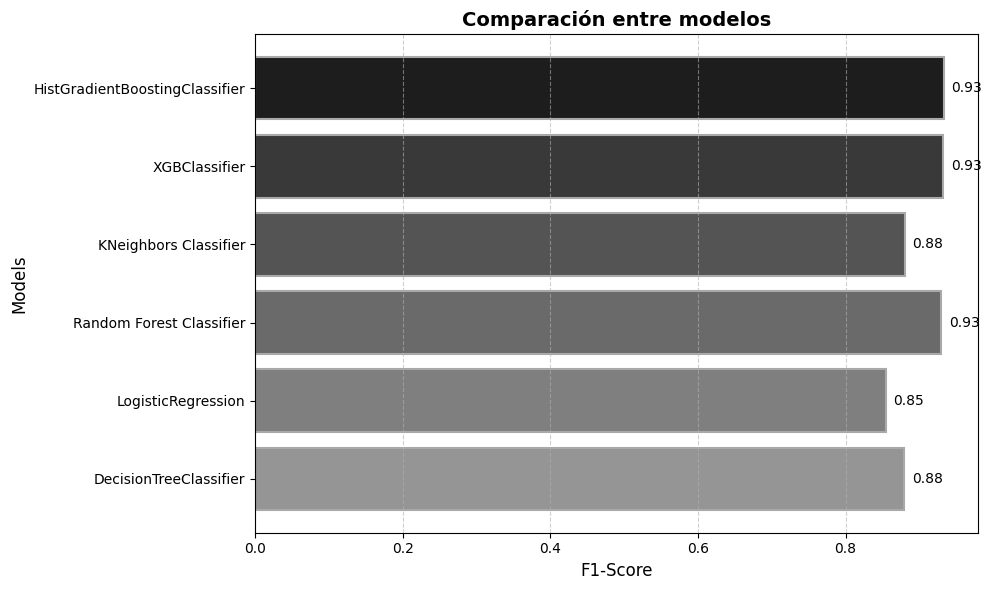

In [674]:
f1_score_comparison(models, f1_scores)

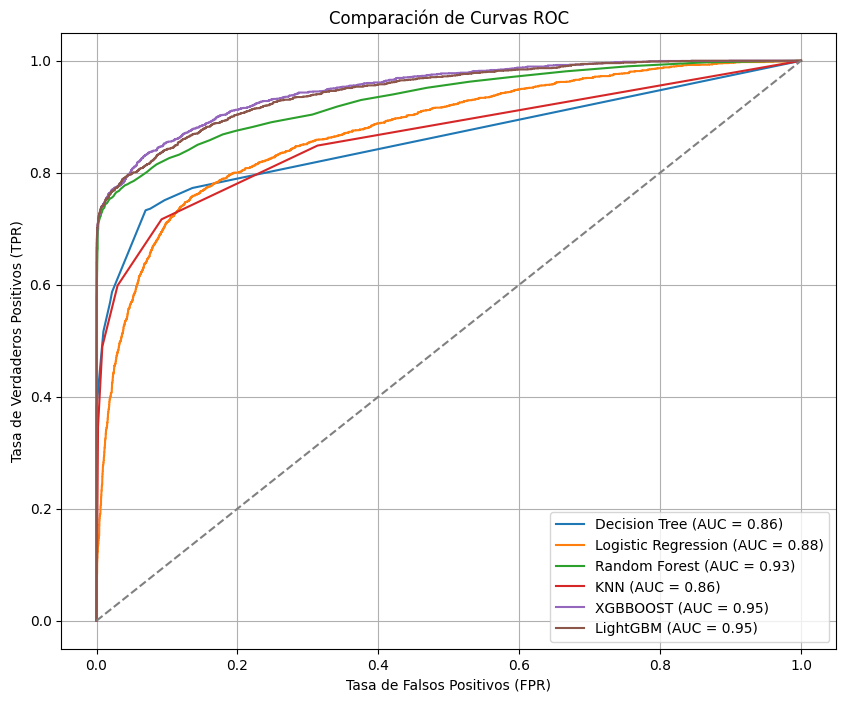

In [675]:
models = {
    'Decision Tree': pred_dec,
    'Logistic Regression': pred_log,
    'Random Forest': pred_rand,
    'KNN': pred_knn,
    'XGBBOOST': pred_xgb,
    'LightGBM': pred_light,
}

plot_roc_curve_comparison(models, X_test, y_test)